In [1]:
# Standard imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# For plotting inline
%matplotlib inline
plt.ion()

In [2]:
# Import suftware (use development copy)
import sys
sys.path.append('../../suftware')

import suftware as sw

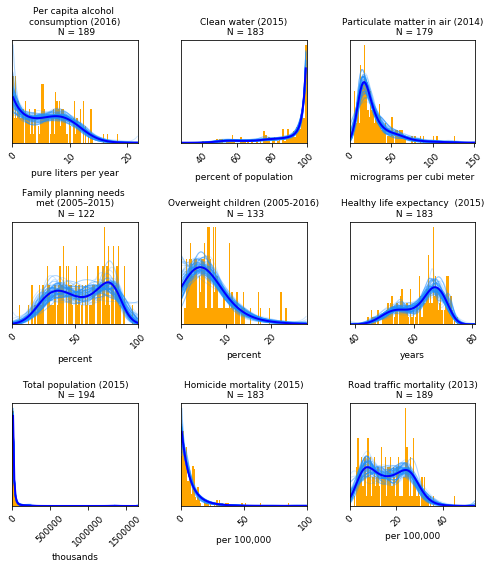

In [3]:
# Do density estimation for various WHO datasets
data_names = ['who.alcohol_consumption', 
              'who.clean_water',
              'who.particulate_matter',
              'who.family_planning', 
              'who.child_overweight',
              'who.life_expectancy_healthy',
              'who.population',
              'who.homicide', 
              'who.traffic_mortality',
             ]

num_fig_rows = 3
num_fig_cols = 3
fontsize=9

# Create figure
figsize=[7.0,8.0]

fig, axarr = plt.subplots(nrows=num_fig_rows, ncols=num_fig_cols, figsize=figsize)
axes = axarr.flatten()

for i in range(len(data_names)):
    data_name = data_names[i]
    ax = axes[i]
    
    dataset = sw.ExampleDataset(data_name)
    density = sw.DensityEstimator(dataset.data)
    density_sample_values = density.evaluate_samples(density.grid)
    
    ax.bar(density.grid, density.histogram, density.grid_spacing, color='orange', alpha=1)    
    ax.plot(density.grid, density_sample_values, color='dodgerblue', linewidth=1, alpha=0.2)
    ax.plot(density.grid, density.values, color='blue', linewidth=2, alpha=1)
    
    ax.set_xlim(density.bounding_box)
    ax.set_xlabel(dataset.units, fontsize=fontsize)
    ax.tick_params(axis='x', rotation=45, labelsize=fontsize)
    ax.tick_params(axis='y', which='both', left=False, labelleft=False)
    ax.set_title(dataset.description.replace(')',')\n N = %d'%sum(~np.isnan(dataset.data))), fontsize=fontsize)

plt.tight_layout()
plt.savefig('figures/fig_S4.pdf')
plt.show()